<a href="https://colab.research.google.com/github/DoniJ12/Machine-Learning/blob/main/Hat_Classifier_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
# Re-import libraries (if starting fresh)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 1: Adjusted Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,       # Reduced from 20
    width_shift_range=0.1,   # Reduced from 0.2
    height_shift_range=0.1,  # Reduced from 0.2
    shear_range=0.1,         # Reduced from 0.2
    zoom_range=0.1,          # Reduced from 0.2
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/hat_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/hat_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Confirm data loading
print(f"Training images: {train_generator.samples}")
print(f"Validation images: {validation_generator.samples}")
print(train_generator.class_indices)

Found 402 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Training images: 402
Validation images: 100
{'with_hat': 0, 'without_hat': 1}


In [ ]:
# Step 2: Load VGG16 and Build Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze initially

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.7),  # Increased from 0.5
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 275s 22s/step - accuracy: 0.5677 - loss: 2.2813 - val_accuracy: 0.7396 - val_loss: 0.5615
Epoch 2/15
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5000 - loss: 2.0028

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5000 - loss: 2.0028 - val_accuracy: 0.6979 - val_loss: 0.5585
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 201s 18s/step - accuracy: 0.6152 - loss: 0.9782 - val_accuracy: 0.6875 - val_loss: 0.5326
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7188 - loss: 0.4811 - val_accuracy: 0.7708 - val_loss: 0.4758
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 171s 12s/step - accuracy: 0.7646 - loss: 0.5228 - val_accuracy: 0.7500 - val_loss: 0.4844
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.6562 - loss: 0.5367 - val_accuracy: 0.7917 - val_loss: 0.4865
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 200s 15s/step - accuracy: 0.7798 - loss: 0.5243 - val_accuracy: 0.7396 - val_loss: 0.4903
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7812 - loss: 0.4763 - val_accuracy: 0.7396 - val_loss: 0.5000
Epoch 9/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 203s 12s/step - accuracy: 0.7994 - loss: 0.4655 - val_accuracy: 0.7812 - val_loss: 0.

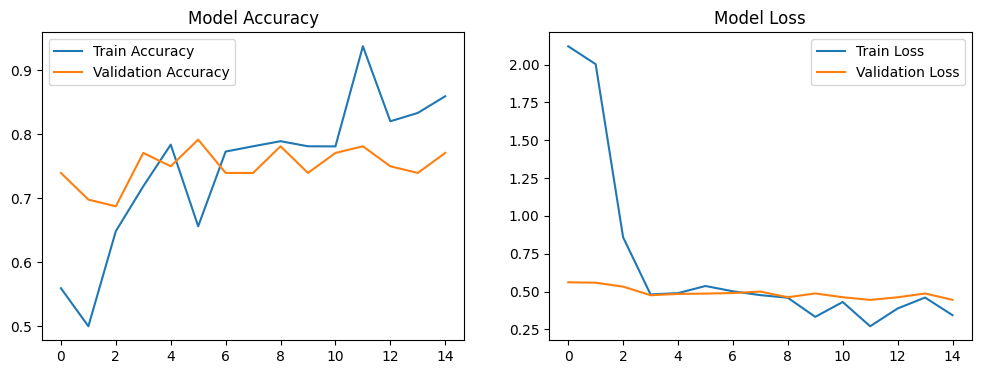

In [ ]:
# Step 3: Initial Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,  # Reduced from 20 to avoid overfitting
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 181s 14s/step - accuracy: 0.8262 - loss: 0.3995 - val_accuracy: 0.7917 - val_loss: 0.4291
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8750 - loss: 0.3721 - val_accuracy: 0.7604 - val_loss: 0.4423
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 199s 13s/step - accuracy: 0.8590 - loss: 0.2739 - val_accuracy: 0.8021 - val_loss: 0.3582
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8333 - loss: 0.2137 - val_accuracy: 0.8333 - val_loss: 0.3770
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 143s 12s/step - accuracy: 0.9513 - loss: 0.1792 - val_accuracy: 0.8125 - val_loss: 0.3277
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.9688 - loss: 0.1412 - val_accuracy: 0.8333 - val_loss: 0.3427
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 202s 17s/step - accuracy: 0.9076 - loss: 0.2104 - val_accuracy: 0.8125 - val_loss: 0.3524
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8438 - loss: 0.3879 - val_accuracy: 0.7812 - v

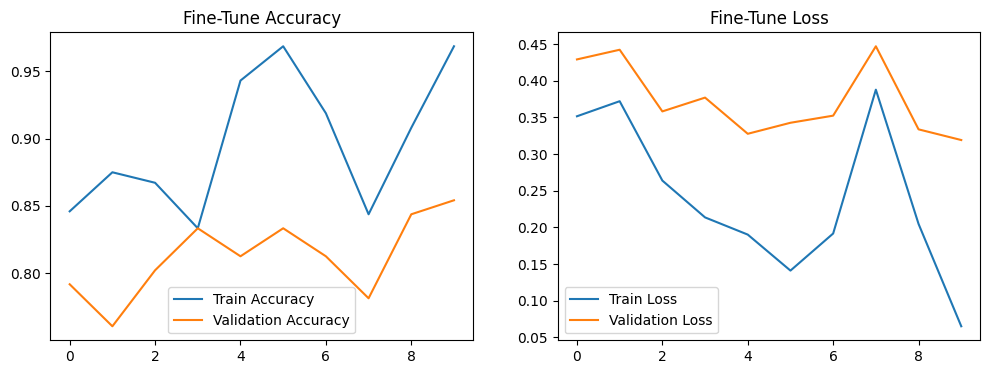

In [ ]:
# Step 4: Fine-Tune
base_model.trainable = True
for layer in base_model.layers[:-8]:  # Unfreeze last 8 layers (up from 4)
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot fine-tuning results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fine-Tune Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Fine-Tune Loss')
plt.legend()
plt.show()


In [ ]:

# Step 5: Evaluate
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step - accuracy: 0.8103 - loss: 0.3470
Validation Loss: 0.3332
Validation Accuracy: 82.00%


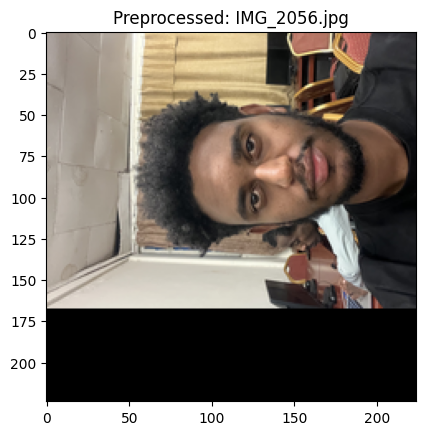

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: IMG_2056.jpg - Raw Prediction: 0.9584 - Label: Without hat


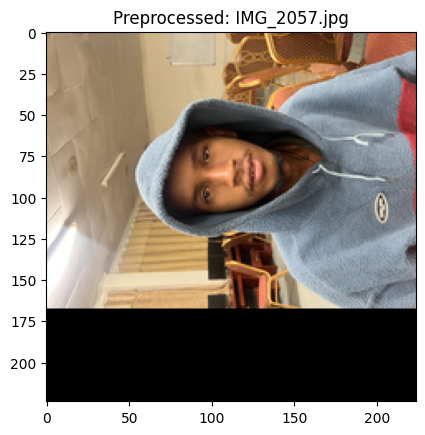

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: IMG_2057.jpg - Raw Prediction: 0.0247 - Label: With hat


In [ ]:
from PIL import Image, ImageOps
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path)
    # Resize while preserving aspect ratio
    img = img.resize((224, int(224 * img.size[1] / img.size[0])), Image.Resampling.LANCZOS)
    if img.size[1] < 224:  # Pad bottom if too short
        img = ImageOps.pad(img, (224, 224), color=(0, 0, 0), centering=(0.5, 0))
    else:  # Crop from top to keep hats
        img = img.crop((0, 0, 224, 224))
    return image.img_to_array(img) / 255.0

# Test images from Google Drive
test_dir = '/content/drive/MyDrive/hat_test_from_camera/'
test_images = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]

for test_image in test_images:
    img_path = os.path.join(test_dir, test_image)
    img_array = preprocess_image(img_path)

    # Visualize to confirm hats are visible
    plt.imshow(img_array)
    plt.title(f"Preprocessed: {test_image}")
    plt.show()

    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    label = "With hat" if prediction[0] < 0.5 else "Without hat"
    print(f"Image: {test_image} - Raw Prediction: {prediction[0][0]:.4f} - Label: {label}")

In [ ]:
print(train_generator.class_indices)

{'with_hat': 0, 'without_hat': 1}


In [ ]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/hat_classifier_model.h5')
print("Model saved to /content/drive/MyDrive/hat_classifier_model.h5")

Model saved to /content/drive/MyDrive/hat_classifier_model.h5


In [ ]:
# Save the model to Google Drive in .keras format
model.save('/content/drive/MyDrive/hat_classifier_model.keras')
print("Model saved to /content/drive/MyDrive/hat_classifier_model.keras")

Model saved to /content/drive/MyDrive/hat_classifier_model.keras
